## Human Cognitive Score Prediction - Exploratory Data Analysis

## Overview

In this analysis, a dataset containing 80,000 samples is explored with the objective of predicting human cognitive scores based on a variety of lifestyle, demographic, and behavioral features. The dataset includes attributes such as age, sleep duration, stress level, diet type, screen time, exercise frequency, caffeine intake, and more—each potentially influencing cognitive performance. This dataset is sourced from [Kaggle](https://www.kaggle.com/datasets/samxsam/human-cognitive-performance-analysis/data).

The goal is to uncover meaningful patterns and relationships within the data, perform relevant preprocessing and feature engineering, and build a robust predictive model to estimate an individual's cognitive score. Throughout the analysis, trends are visualized, categorical and numerical features are handled appropriately, and the impact of various factors on human cognition is evaluated. 

### Importing The Libraries

In [1220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Reading the Data

In [1223]:
data = pd.read_csv('human_cognitive_performance.csv')

In [1225]:
data.shape

(80000, 13)

In [1227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [1229]:
data.head()

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


### Data Description 

1. **User_ID** – Unique Identifier for Users  
2. **Age** – Age of the User  
3. **Gender** – Gender of the User  
4. **Sleep_Duration** – Sleep hours per night  
5. **Stress_Level** – Stress Level on a scale of 1–10 (1 - No Stress & 10 - Extreme Stress)  
6. **Diet_Type** – Vegetarian, Non-Vegetarian, Vegan  
7. **Daily_Screen_Time** – Hours spent on screens like mobile, laptop, tab etc.  
8. **Exercise_Frequency** – Low, Medium, High  
9. **Caffeine_Intake** – Caffeine consumed per day in milligrams (mg)  
10. **Reaction_Time** – Reaction Time in milliseconds (ms)  
11. **Memory_Test_Score** – Score out of 100 for a conducted memory test  
12. **Cognitive_Score** – Score computed based on the above features  


### Understanding the Data Distribution

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep_Duration'}>,
        <Axes: title={'center': 'Stress_Level'}>],
       [<Axes: title={'center': 'Daily_Screen_Time'}>,
        <Axes: title={'center': 'Caffeine_Intake'}>,
        <Axes: title={'center': 'Reaction_Time'}>],
       [<Axes: title={'center': 'Memory_Test_Score'}>,
        <Axes: title={'center': 'Cognitive_Score'}>,
        <Axes: title={'center': 'AI_Predicted_Score'}>]], dtype=object)

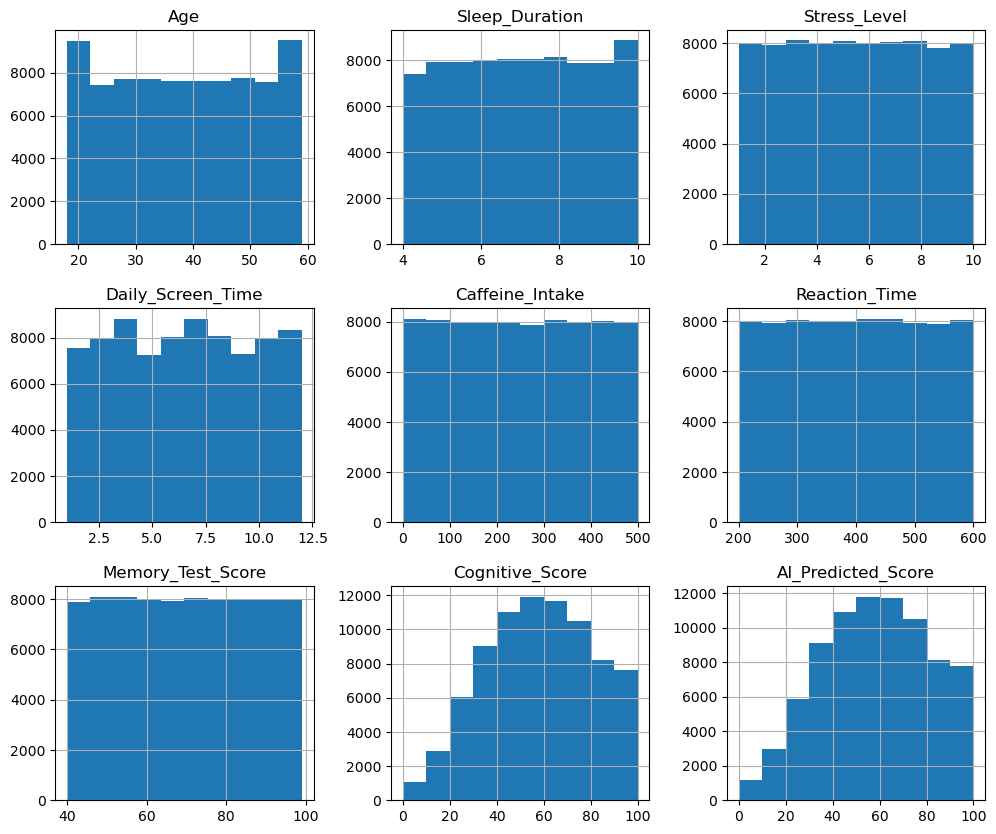

In [1236]:
data.hist(figsize=(12, 10))

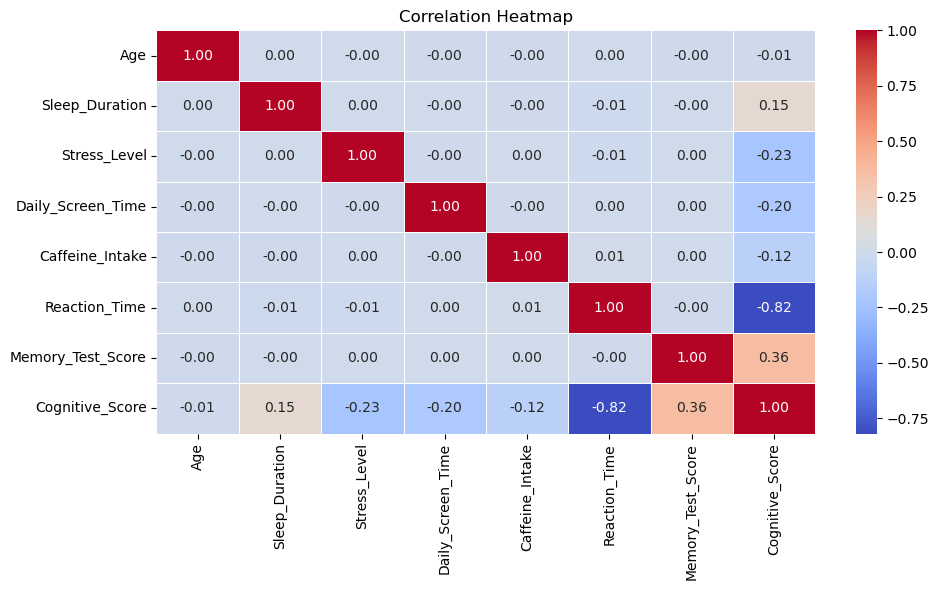

In [1237]:
data.drop(columns=['AI_Predicted_Score'], inplace=True, axis= 1)
corr_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Feature Engineering - Feature Creation 

Creating two features Age_Group & Sleep_Category for better visualization.
1. **Age_Group** - Groups **Age** column value into 5 bins (**'<20', '20-29', '30-39', '40-49', '50-60'**)
2. **Sleep_Category** - Catagorizes sleep as **'Very Short', 'Short', 'Recommended', 'Long'**, based on the **Sleep_Duration** column value


In [1240]:
bins = [0, 20, 30, 40, 50, 60]
labels = ['<20', '20-29', '30-39', '40-49', '50-60']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

bins = [0, 5, 7, 8, 24]
labels = ['Very Short', 'Short', 'Recommended', 'Long']
data['Sleep_Category'] = pd.cut(data['Sleep_Duration'], bins=bins, labels=labels, right=False)

### Data Visualization

Text(0.5, 1.0, 'Cognitive Score Across Age Groups by Sleep Category')

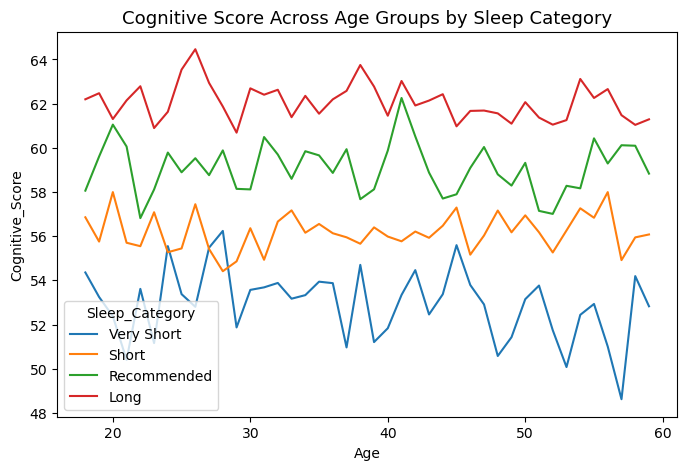

In [1242]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data = data, x = 'Age', y= 'Cognitive_Score', hue='Sleep_Category', errorbar= None)
ax.set_title('Cognitive Score Across Age Groups by Sleep Category', fontsize=13)

> - Line plot of Age vs. Cognitive_Score with Sleep_Category as a hue indicates that Age alone doesn't have a strong direct impact on Cognitive_Score.
> - Sleep_Category appears to influence the score range—individuals with longer sleep durations tend to exhibit higher Cognitive_Scores.


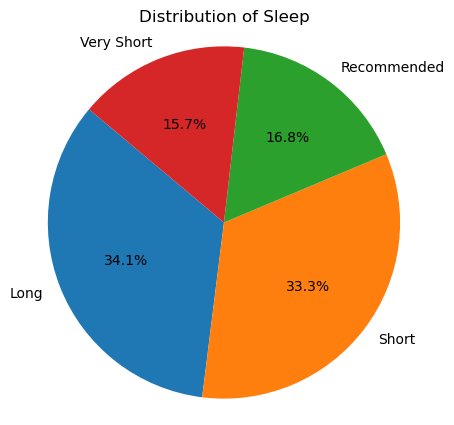

In [1244]:
Sleep_Category_Count = data['Sleep_Category'].value_counts()
# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(Sleep_Category_Count, labels=Sleep_Category_Count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sleep', fontsize=12)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

> Analyzing the distribution of **Sleep_Category** reveals that only around **17%** of the sample population gets the recommended amount of sleep.


Text(0.5, 1.0, 'Distribution of Sleep Categories Based on Diet')

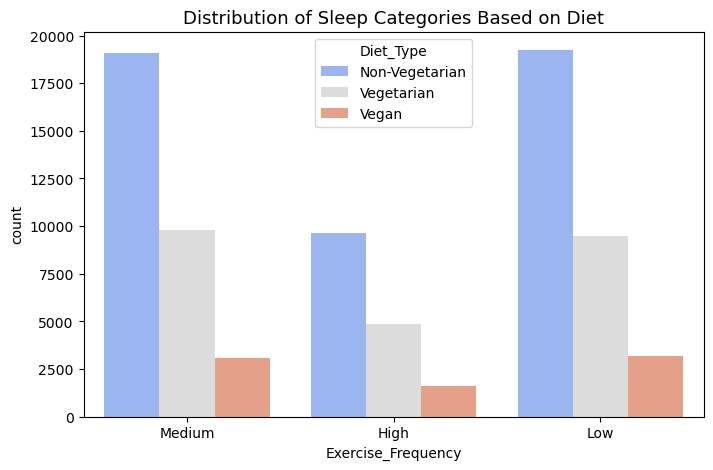

In [1246]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x=  data['Exercise_Frequency'], hue = data['Diet_Type'], palette='coolwarm')
ax.set_title('Distribution of Sleep Categories Based on Diet', fontsize=13)

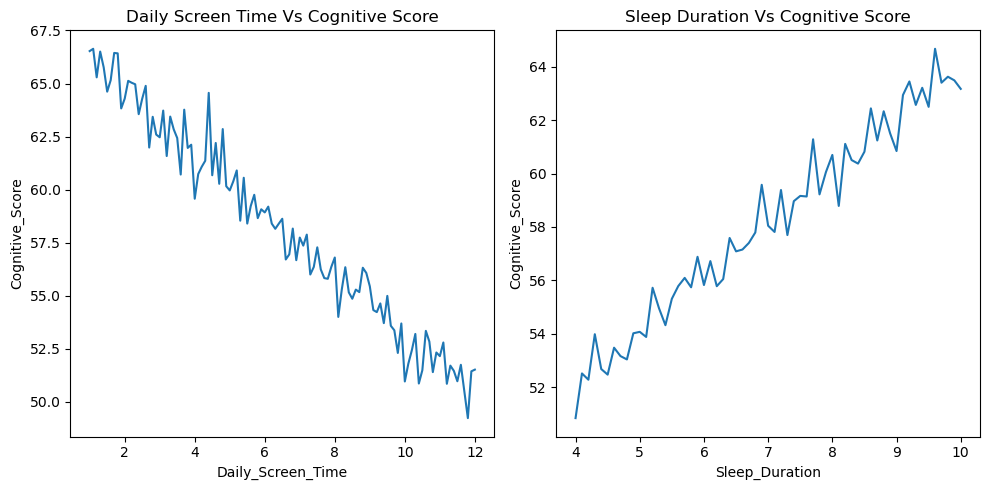

In [1248]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Example plots
sns.lineplot(data = data, x='Daily_Screen_Time',y='Cognitive_Score', ax=axes[0], errorbar=None)
axes[0].set_title('Daily Screen Time Vs Cognitive Score', fontsize=12)

sns.lineplot(data = data, x='Sleep_Duration',y='Cognitive_Score',ax=axes[1],  errorbar=None )
axes[1].set_title('Sleep Duration Vs Cognitive Score', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

> The line plot indicates a **negative correlation between Screen Time and Cognitive Score**, 
suggesting that increased screen time is associated with lower cognitive performance.

> The line plot suggests a **positive correlation between Sleep Duration** and **Cognitive Score**, indicating that longer sleep duration tends to correlate with higher cognitive performance.

Text(0.5, 1.0, 'Caffeine Intake Vs Cognitive Score')

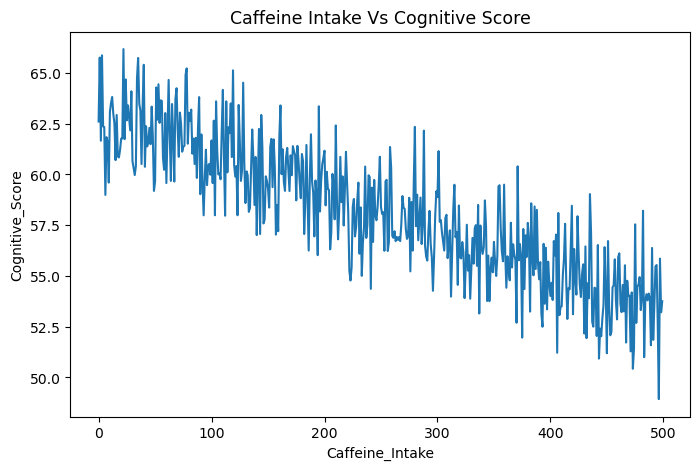

In [1250]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data = data, x='Caffeine_Intake',y='Cognitive_Score', errorbar=None)
ax.set_title('Caffeine Intake Vs Cognitive Score', fontsize=12.5)

> Contrary to the common belief that caffeine boosts alertness, the plot reveals a slight negative correlation 
 between caffeine intake and cognitive score, suggesting that higher caffeine consumption may be associated with lower cognitive performance in this dataset.


Text(0.5, 1.0, 'Impact of Stress Level on Cognitive Score Across Exercise Frequencies')

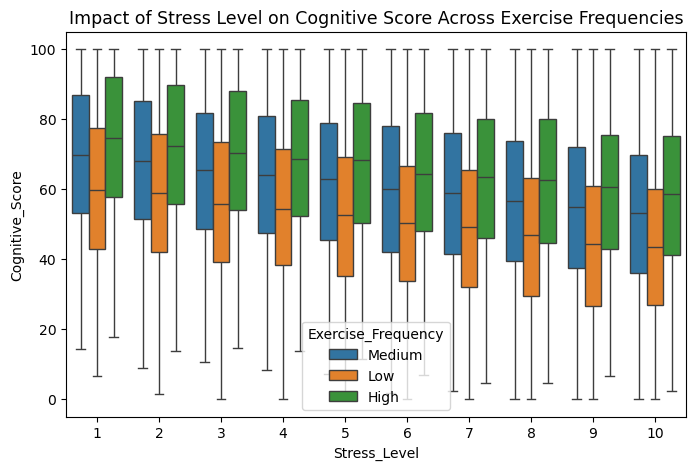

In [1258]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=data, x='Stress_Level', y='Cognitive_Score', hue='Exercise_Frequency')
ax.set_title('Impact of Stress Level on Cognitive Score Across Exercise Frequencies', fontsize=12.5)


> The box plot shows a negative correlation between **Stress Level** and **Cognitive Score**, with **Exercise Frequency** enhancing cognitive performance. 
> Exercise Mitigates the Impact of Stress on Cognitive Performance

Text(0.5, 1.0, 'Impact of Memory Test Score on Cognitive Score')

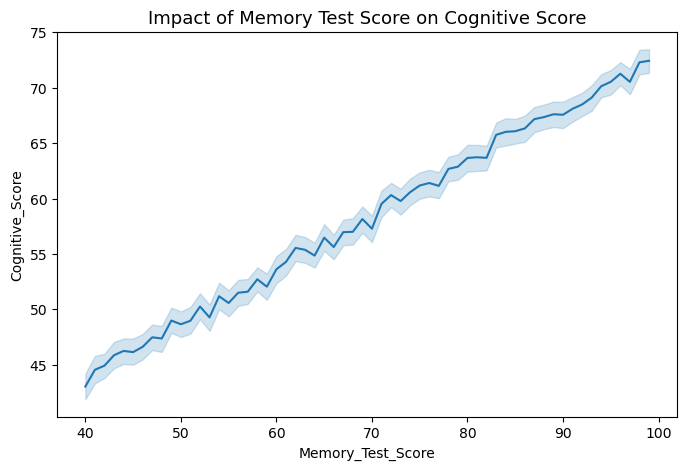

In [1262]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data = data, x='Memory_Test_Score',y='Cognitive_Score'  )
ax.set_title('Impact of Memory Test Score on Cognitive Score', fontsize=13)

> Memory Test Score has a positive relation to Cognitive Score.

Text(0.5, 1.0, 'Age Group Vs Reaction Time')

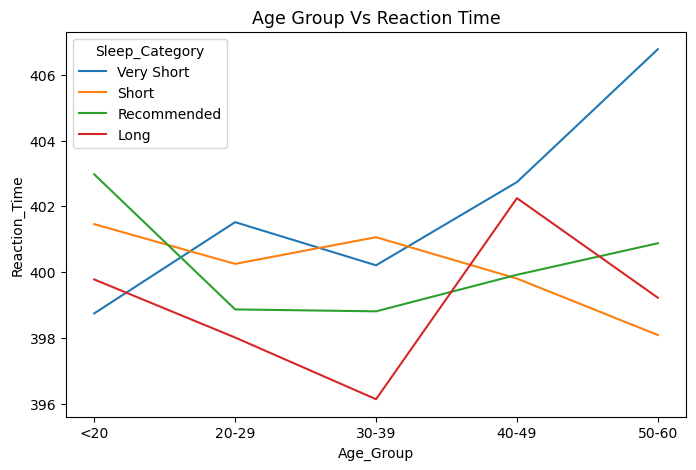

In [1266]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data = data, x='Age_Group',y= 'Reaction_Time',hue = 'Sleep_Category',errorbar=None)
ax.set_title('Age Group Vs Reaction Time', fontsize=12.5)

> The plot shows a dip in **Reaction Time** across all sleep categories in the 30–40 age group, followed by a gradual increase up to age 50, and a decline in older age. 
> Notably, **Short Sleepers** exhibit an unusual spike in reaction time, indicating potential cognitive sluggishness.


Text(0.5, 1.0, 'Cognitive Score Trends with Varying Reaction Times')

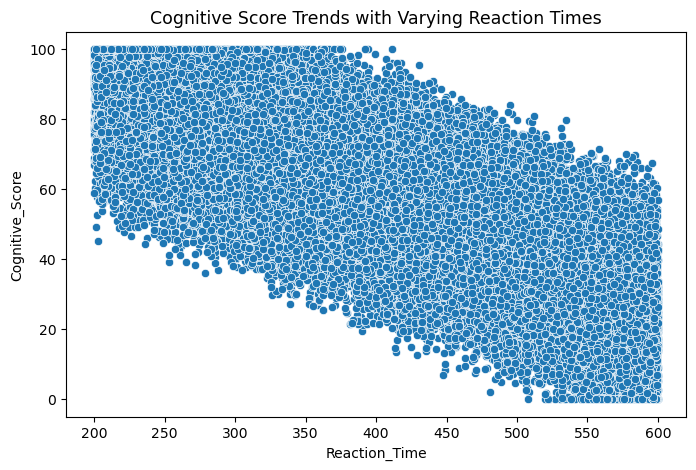

In [1269]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data= data, x='Reaction_Time', y='Cognitive_Score')
ax.set_title('Cognitive Score Trends with Varying Reaction Times', fontsize=12.5)

> Scatter plot between Reaction time and cognitive score shows, there is a negative corelation. People who take more time to react turn out to be wih less cognitive score.

### Feature Engineering - Feature Selection

In [1273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   User_ID             80000 non-null  object  
 1   Age                 80000 non-null  int64   
 2   Gender              80000 non-null  object  
 3   Sleep_Duration      80000 non-null  float64 
 4   Stress_Level        80000 non-null  int64   
 5   Diet_Type           80000 non-null  object  
 6   Daily_Screen_Time   80000 non-null  float64 
 7   Exercise_Frequency  80000 non-null  object  
 8   Caffeine_Intake     80000 non-null  int64   
 9   Reaction_Time       80000 non-null  float64 
 10  Memory_Test_Score   80000 non-null  int64   
 11  Cognitive_Score     80000 non-null  float64 
 12  Age_Group           80000 non-null  category
 13  Sleep_Category      80000 non-null  category
dtypes: category(2), float64(4), int64(4), object(4)
memory usage: 7.5+ MB


In [1275]:
data.drop(columns=['Age_Group','Sleep_Category'], inplace=True, axis= 1)
data.drop(columns=['User_ID'], inplace=True, axis= 1)

We are retaining the original features and dropping the newly created columns, before splotting them into train and test set. Additionally, we are removing User_ID and AI_Prediction_Score as they do not contribute to our goal of predicting the Cognitive_Score.

### Train-Test Data Split

In [1279]:
X = data.drop(columns = ['Cognitive_Score'])
y = data['Cognitive_Score']

In [1281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineering - Feature Transformation

### Feature Scaling & Encoding
- **Normalization** was applied to the numerical features — **Age**, **Caffeine_Intake**, **Reaction_Time**, and **Memory_Test_Score** — as they exhibit a nearly uniform (non-Gaussian) distribution.

- **Ordinal Encoding** was performed on the features **Stress_Level** and **Exercise_Frequency**, as they have an inherent order.

- **Nominal Encoding** was applied to the categorical features **Gender** and **Diet_Type**, since they are non-ordinal categories.

- **Joint Encoding** was applied to **Sleep_Duration** and **Daily_Screen_Time**, as both features share the same unit (hours) and are conceptually related in the context of daily routines.


In [1287]:
# Step 1: Select the columns to jointly scale
joint_cols = ['Sleep_Duration', 'Daily_Screen_Time']
joint_data = X_train[joint_cols]

# Step 2: Apply MinMaxScaler on them together
scaler = MinMaxScaler()
joint_scaled = scaler.fit_transform(joint_data)

# Step 3: Assign the scaled values back to the same columns
X_train[joint_cols] = joint_scaled

In [1291]:
#Ordinal Encoding Ordering
Stress_Level_Order = [[1,2,3,4,5,6,7,8,9,10]]
Exercise_Frequency_Order = [['Low', 'Medium', 'High']]

#Ordered Columns - Ordinal Encoding
ord1_col = ['Stress_Level'] 
ord2_col = ['Exercise_Frequency']

#Nominal Columns - One hot encoding
nom_cols = ['Gender', 'Diet_Type']

#numerical Columns - Almost Uniformly Distributed, so normalizing
num_cols = ['Age', 'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score' ]


In [1293]:
preprocessor = ColumnTransformer(transformers=[
    ('ord1', OrdinalEncoder(categories = Stress_Level_Order), ord1_col),  # Ordinal encode ordered categories
    ('ord2', OrdinalEncoder(categories = Exercise_Frequency_Order), ord2_col),
    ('num', MinMaxScaler(), num_cols),  # MinMax scale numerical features
    ('nom', OneHotEncoder(drop='first'), nom_cols)  # One-hot encode nominal categories
], remainder='passthrough')


In [1295]:
X_train_transformed = preprocessor.fit_transform(X_train) 

### Model Development

In [1299]:
LR_model = LinearRegression()
LR_model.fit(X_train_transformed, y_train)

LinearRegression()

### Model Evaluation

In [1301]:
# Step 1: Select the columns to jointly scale
joint_cols = ['Sleep_Duration', 'Daily_Screen_Time']
joint_data = X_test[joint_cols]

# Step 2: Apply MinMaxScaler on them together
scaler = MinMaxScaler()
joint_scaled = scaler.fit_transform(joint_data)

# Step 3: Assign the scaled values back to the same columns (or new ones)
X_test[joint_cols] = joint_scaled

In [1303]:
X_test_transformed = preprocessor.fit_transform(X_test) 

In [1305]:
y_pred = LR_model.predict(X_test_transformed)

In [1307]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [1309]:
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2_score(y_test, y_pred))

Root Mean Squared Error: 1.9401896808688555
R² Score: 0.9928573068983969


In [1317]:
LR_model.coef_

array([-1.92971585e+00,  7.59082997e+00, -1.48338088e-02, -9.60574549e+00,
       -6.54623981e+01,  2.85824768e+01,  4.62653941e-03, -1.01220758e-02,
       -1.35996817e-02,  3.74470412e-02,  1.15579282e+01, -1.59709674e+01])

In [1357]:
mean_squared_error(y_test, y_pred)

3.764335997749991

### Conclusion

Exploratory Data Analysis (EDA) has been conducted on the dataset, and a basic predictive model for estimating the Cognitive Score has been developed. It is acknowledged that this model can be further improved through hyperparameter tuning. Additionally, alternative and more advanced models may be explored to enhance predictive accuracy and uncover a more robust solution.

